### 1.목표
- 어떤 사람이 일년에 개인 수입이 $50k 달러 초과인지 예측해보자.
- 수입이 $50k 이상인 : 1
- 수입이 $50k 미만 : 0
- binary Classification

In [1]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)

### 2.데이터 불러오기
- train : 학습용 데이터
- test : 평가용 데이터
- submission : 제출용 데이터

In [3]:
# 데이터 불러오기
train = pd.read_csv("../data/train.csv", na_values=" ?")
test = pd.read_csv("../data/test.csv",na_values=" ?")

In [4]:
# 데이터 형태 확인
print("훈련용 데이터 : ", train.shape)
print("평가용 데이터 : ", test.shape)

훈련용 데이터 :  (29305, 16)
평가용 데이터 :  (19537, 15)


In [5]:
# 훈련용 데이터 확인
train.head(10)

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
5,6,66,Self-emp-not-inc,274451,9th,5,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,25,United-States,1
6,7,56,Private,152874,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,1741,40,United-States,0
7,8,70,Self-emp-not-inc,165586,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,0
8,9,21,Private,211013,Assoc-voc,11,Married-civ-spouse,Other-service,Other-relative,White,Female,0,0,50,Mexico,0
9,10,33,Private,192644,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,35,Puerto-Rico,0


In [6]:
# 평가용 데이터 확인
test.head(10)

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29306,18,NaN,245274,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States
1,29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
2,29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
3,29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States
5,29311,17,Private,25690,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,10,United-States
6,29312,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States
7,29313,22,Self-emp-inc,120753,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,50,United-States
8,29314,35,Private,127306,Assoc-voc,11,Never-married,Adm-clerical,Own-child,White,Female,14344,0,40,United-States
9,29315,36,NaN,205396,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,4,United-States


In [7]:
# 훈련용 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       27642 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      27637 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  28810 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [8]:
# object type columns = 8개
# int type columns = 8개

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              19537 non-null  int64 
 1   age             19537 non-null  int64 
 2   workclass       18401 non-null  object
 3   fnlwgt          19537 non-null  int64 
 4   education       19537 non-null  object
 5   education-num   19537 non-null  int64 
 6   marital-status  19537 non-null  object
 7   occupation      18396 non-null  object
 8   relationship    19537 non-null  object
 9   race            19537 non-null  object
 10  sex             19537 non-null  object
 11  capital-gain    19537 non-null  int64 
 12  capital-loss    19537 non-null  int64 
 13  hours-per-week  19537 non-null  int64 
 14  native-country  19175 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.2+ MB


In [10]:
# object type columns = 8개
# int type columns = 7개

In [11]:
# 훈련용 데이터 컬럼 확인
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
# 평가용 데이터 컬럼 확인
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [13]:
# 훈련용 - 평가용 컬럼 개수 차이 (income)
set(train.columns)- set(test.columns)

{'income'}

In [14]:
#income 컬럼이 정답 : label
train['income'].value_counts()

0    22260
1     7045
Name: income, dtype: int64

#### 컬럼 정보들
- id : 샘플 아이디
- age : 나이
- workclass : 일 유형 (범주)
- fnlwgt : CPS(Current Population Survey) 가중치 (이 사람이 표본에 뽑힐 가능성에 따른 가중치. 높을수록 뽑히기 어려운 사람?)
- education : 교육수준 (범주)
- education.num : 교육수준 번호 (범주)
- marital.status : 결혼 상태 (범주)
- occupation : 직업 (범주)
- relationship : 가족관계 (범주)
- race : 인종 (범주)
- sex : 성별 (범주)
- capital.gain : 자본 이익 (부동산, 토지, 주식 등)
- capital.loss : 자본 손실
- hours.per.week : 주당 근무시간
- native.country : 본 국적 (범주)
- target : 소득 (target)

In [50]:
temp = train

#### 2.1 컬럼 분석(AGE)

In [15]:
# age 컬럼 널값 확인 
# 29305개 -> 결측치 없다.
train['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29305 entries, 0 to 29304
Series name: age
Non-Null Count  Dtype
--------------  -----
29305 non-null  int64
dtypes: int64(1)
memory usage: 229.1 KB


In [16]:
# age 컬럼 값 개수 출력
train['age'].value_counts().sort_index(ascending=True)

17    358
18    509
19    612
20    683
21    672
22    696
23    818
24    724
25    747
26    689
27    717
28    723
29    745
30    755
31    793
32    769
33    825
34    805
35    828
36    787
37    777
38    744
39    734
40    688
41    738
42    668
43    677
44    626
45    645
46    664
47    643
48    503
49    503
50    527
51    519
52    443
53    429
54    366
55    376
56    339
57    343
58    336
59    303
60    271
61    261
62    228
63    215
64    208
65    172
66    148
67    139
68    112
69     88
70     84
71     69
72     78
73     67
74     54
75     45
76     43
77     35
78     21
79     11
80     23
81     21
82     10
83      6
84      4
85      2
86      1
87      1
88      4
89      1
90     37
Name: age, dtype: int64

In [17]:
# age컬럼의 데이터 요약정보
train['age'].describe()

count    29305.000000
mean        38.659171
std         13.743827
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_38884\3223822309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['age'], rug=True, hist=True, kde=True)


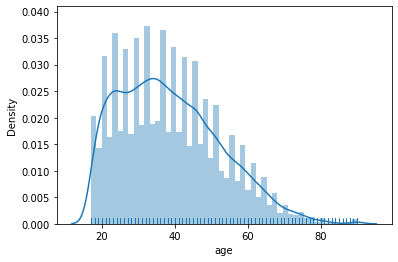

In [18]:
sns.distplot(train['age'], rug=True, hist=True, kde=True)
plt.show()

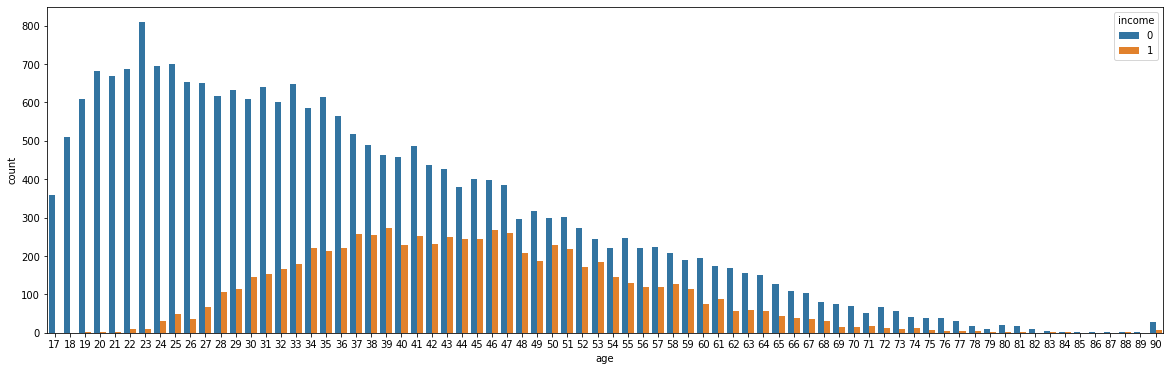

In [19]:
# age 컬럼의 값과 income 시각화 - countplot
plt.figure(figsize=(20,6))
sns.countplot(data=train, x='age', hue='income')
plt.show()

<Figure size 1080x360 with 0 Axes>

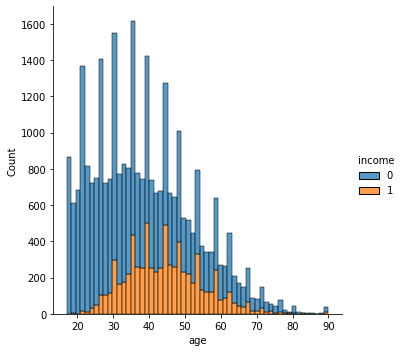

In [20]:
# age 컬럼의 값과 income 시각화 - displot
plt.figure(figsize=(15,5))

sns.displot(x='age', kind='hist', hue='income', data=train, multiple="stack")
plt.show()

In [21]:
train['age'].value_counts().sort_index(ascending=True)

17    358
18    509
19    612
20    683
21    672
22    696
23    818
24    724
25    747
26    689
27    717
28    723
29    745
30    755
31    793
32    769
33    825
34    805
35    828
36    787
37    777
38    744
39    734
40    688
41    738
42    668
43    677
44    626
45    645
46    664
47    643
48    503
49    503
50    527
51    519
52    443
53    429
54    366
55    376
56    339
57    343
58    336
59    303
60    271
61    261
62    228
63    215
64    208
65    172
66    148
67    139
68    112
69     88
70     84
71     69
72     78
73     67
74     54
75     45
76     43
77     35
78     21
79     11
80     23
81     21
82     10
83      6
84      4
85      2
86      1
87      1
88      4
89      1
90     37
Name: age, dtype: int64

In [22]:
# temp 임시 변수로 train데이터 옮겨서 확인하기
temp = train

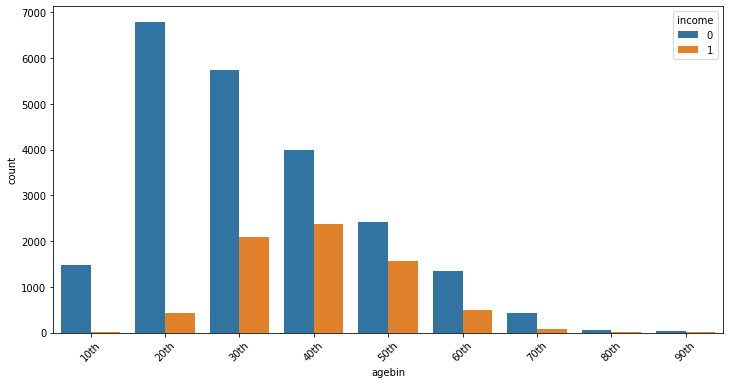

In [23]:
# Binning - 구간 나누기
bins = [-1,19,29,39,49,59,69,79,89,91]
labels =['10th','20th','30th','40th','50th','60th','70th','80th','90th']
temp['agebin'] = pd.cut(temp['age'], bins=bins, labels=labels)

# agebin(나이 구간)에 따른 수입 비교
plt.figure(figsize=(12,6))
sns.countplot(x='agebin', hue='income', data=temp)
plt.xticks(rotation=45)
plt.show()

#### 2.2 컬럼 분석(Workclass)
- workclass : 일 유형 (범주)

In [24]:
# Workclass 컬럼 널값 확인 
# 27642개 -> 결측치 존재
train['workclass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29305 entries, 0 to 29304
Series name: workclass
Non-Null Count  Dtype 
--------------  ----- 
27642 non-null  object
dtypes: object(1)
memory usage: 229.1+ KB


In [25]:
# train 데이터 셋에 1663개 결측치 존재
train['workclass'].isnull().sum()

1663

In [26]:
# test 데이터 셋에 1136개 결측치 존재
test['workclass'].isnull().sum()

1136

In [27]:
# 결측치의 값을 임시로 temp라는 값으로 채워주자
train['workclass'] = train['workclass'].fillna('temp')
test['workclass'] = test['workclass'].fillna('temp')

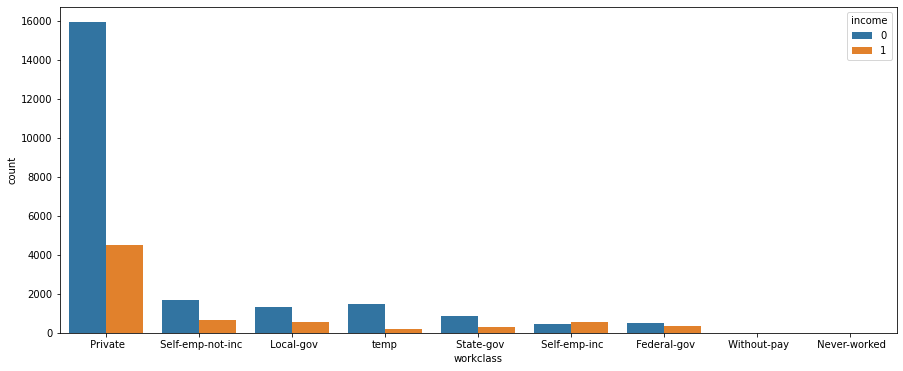

In [90]:
# workclass 데이터 시각화하기 - countplot
plt.figure(figsize=(15,6))
sns.countplot(x='workclass', hue='income', data=train)
plt.show()


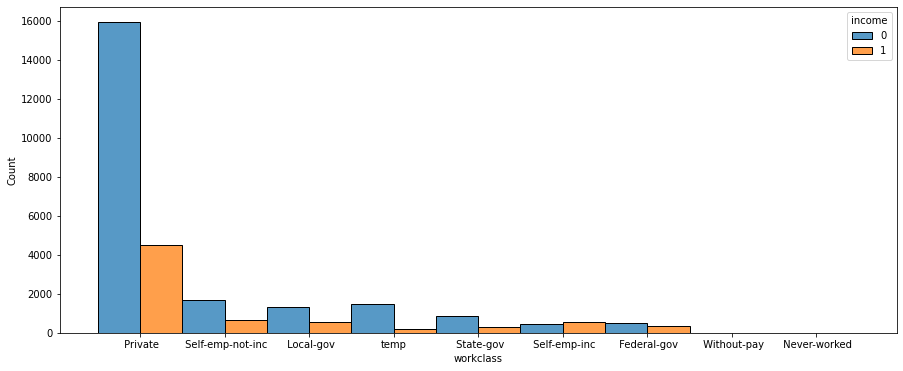

In [91]:
# workclass 데이터 시각화하기 - histogram
# multiple 속성에 dodge를 설정하면 hue옵션의 데이터를 기준으로 그래프가 겹치지 않게 수평으로 분리된다.
plt.figure(figsize=(15,6))
sns.histplot(x='workclass', hue='income', multiple='dodge', data=train)
plt.show()


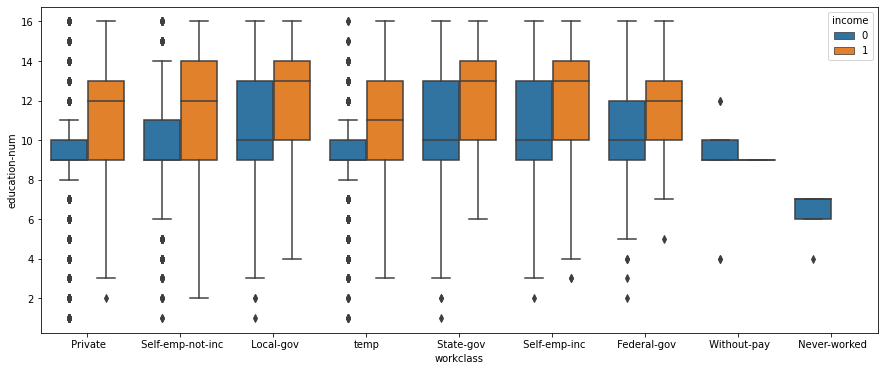

In [33]:
# workclass와 education-num 속성 시각화 해보기 - boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x='workclass', y='education-num', hue='income', data= train)
plt.show()


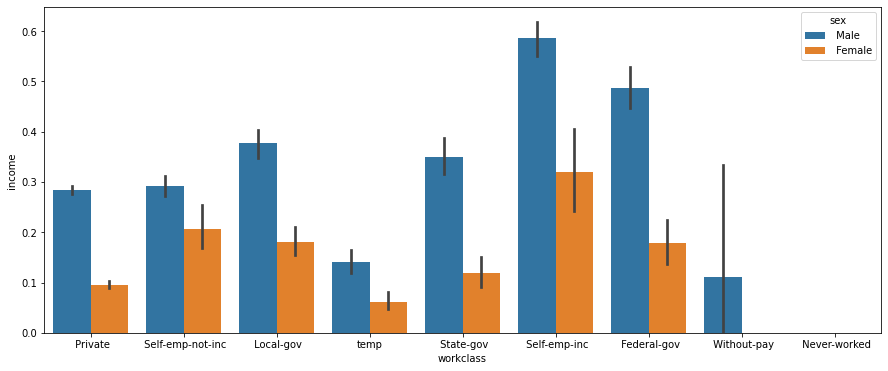

In [32]:
# workclass, income, sex 상관관계 분석 - barplot
plt.figure(figsize=(15,6))
sns.barplot(x='workclass', y='income', hue='sex', data=train)
plt.show()

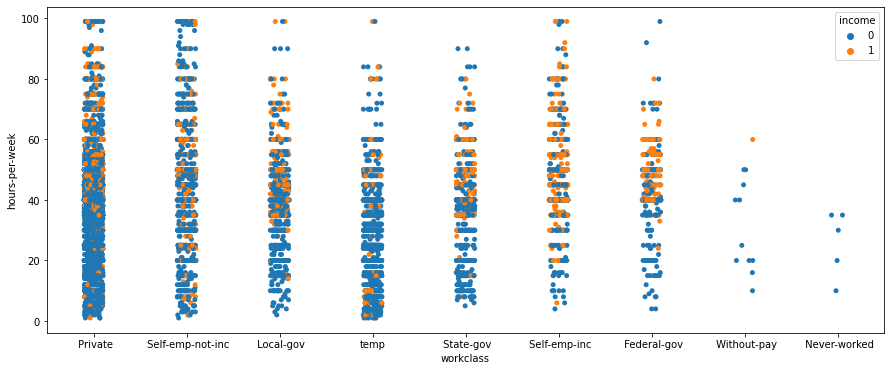

In [34]:
# workclass와 hours-per-week 속성 시각화 해보기 - stripplot

plt.figure(figsize=(15,6))
sns.stripplot(x='workclass', y='hours-per-week', hue='income', data= train)
plt.show()


#### 2.3 컬럼 분석(education)
- education : 교육수준 (범주)


In [36]:
# education 컬럼 널값 확인 
# 29305개 -> 결측치 x
train['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29305 entries, 0 to 29304
Series name: education
Non-Null Count  Dtype 
--------------  ----- 
29305 non-null  object
dtypes: object(1)
memory usage: 229.1+ KB


In [37]:
train['education'].describe()

count        29305
unique          16
top        HS-grad
freq          9435
Name: education, dtype: object

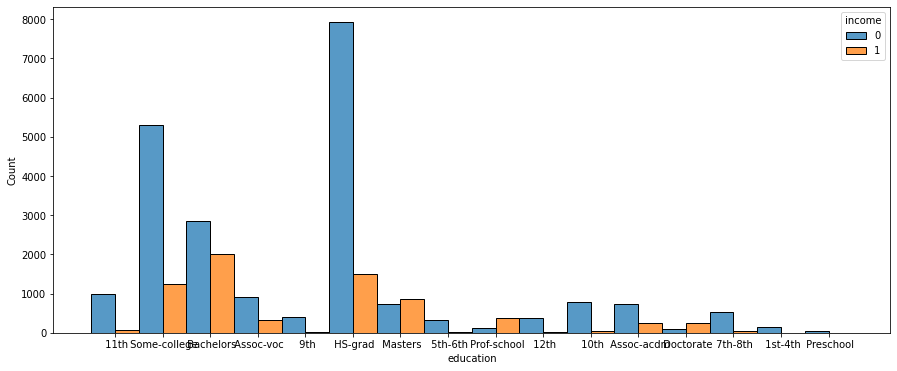

In [92]:
# education 데이터 시각화하기 - histogram
plt.figure(figsize=(15,6))
sns.histplot(x='education', hue='income', multiple='dodge', data=train)
plt.show()

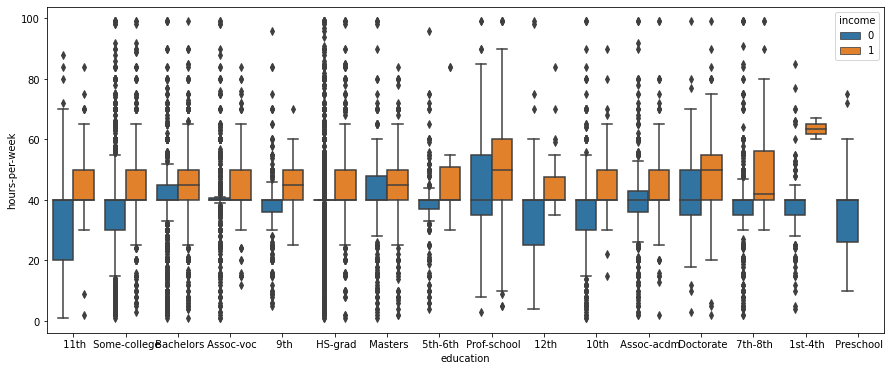

In [93]:
# education과 hours-per-week 속성 시각화 해보기 - boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x='education', y='hours-per-week', hue='income', data= train)
plt.show()

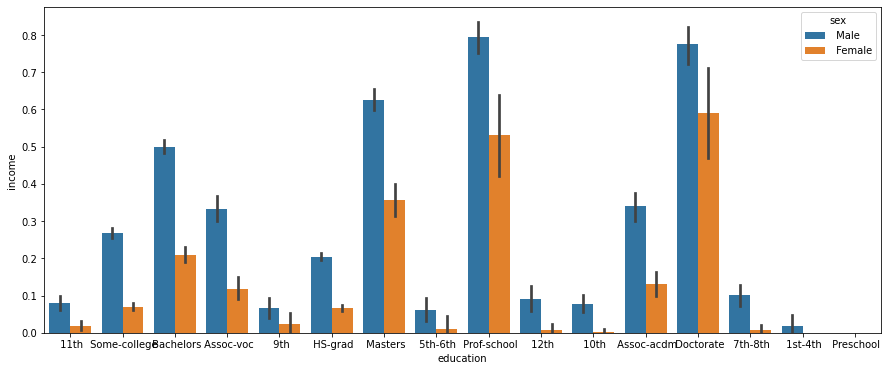

In [86]:
# education, income, sex 상관관계 분석 - barplot
plt.figure(figsize=(15,6))
sns.barplot(x='education', y='income', hue='sex', data=train)
plt.show()

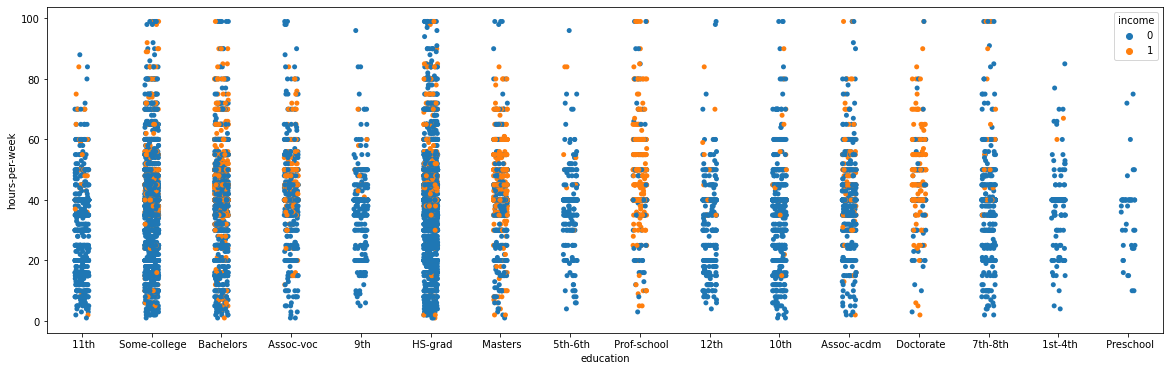

In [46]:
# education과 hours-per-week와 income 시각화- stripplot

plt.figure(figsize=(20,6))
sns.stripplot(x='education', y='hours-per-week', hue='income' ,data=train)
plt.show()

#### 2.4 컬럼분석(education-num)
- education.num : 교육수준 번호 (범주)

In [49]:
# education-num 컬럼 널값 확인 
# 29305개 -> 결측치 없다.
train['education'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29305 entries, 0 to 29304
Series name: education
Non-Null Count  Dtype 
--------------  ----- 
29305 non-null  object
dtypes: object(1)
memory usage: 229.1+ KB


In [53]:
# education컬럼의 데이터 요약정보
train['education'].describe()

count        29305
unique          16
top        HS-grad
freq          9435
Name: education, dtype: object

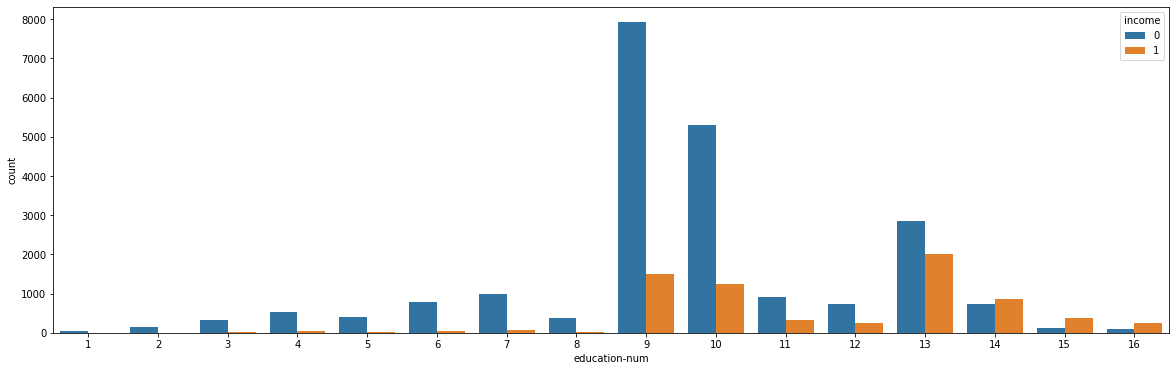

In [57]:
# education-num 컬럼의 값과 income 시각화 - countplot
plt.figure(figsize=(20,6))
sns.countplot(data=train, x='education-num', hue='income')
plt.show()

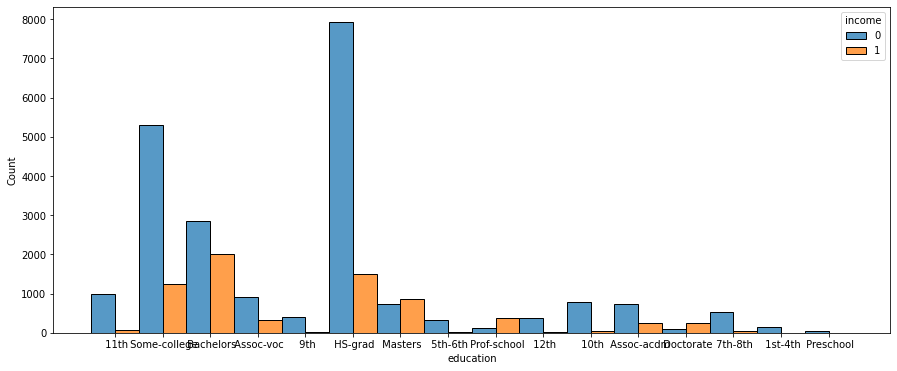

In [94]:
# education-num 컬럼의 값과 income 시각화 - histplot
plt.figure(figsize=(15,6))
sns.histplot(x='education', hue='income', multiple='dodge', data=train)
plt.show()

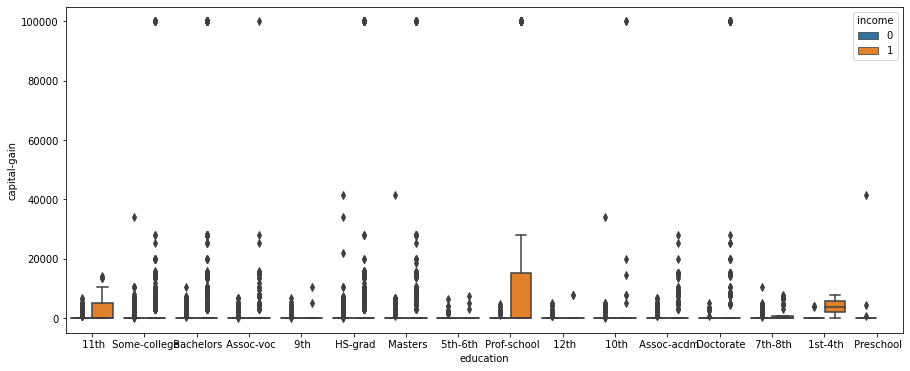

In [97]:
# education과 capital-gain 속성 시각화 해보기 - boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x='education', y='capital-gain', hue='income', data= train)
plt.show()

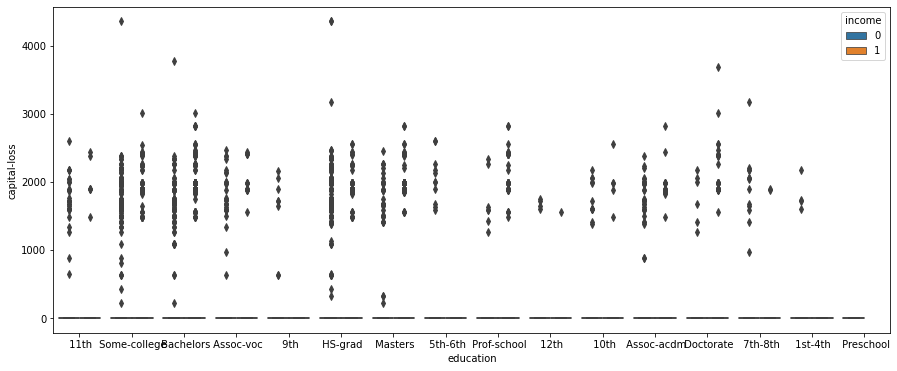

In [98]:
# education과 capital-loss 속성 시각화 해보기 - boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x='education', y='capital-loss', hue='income', data= train)
plt.show()

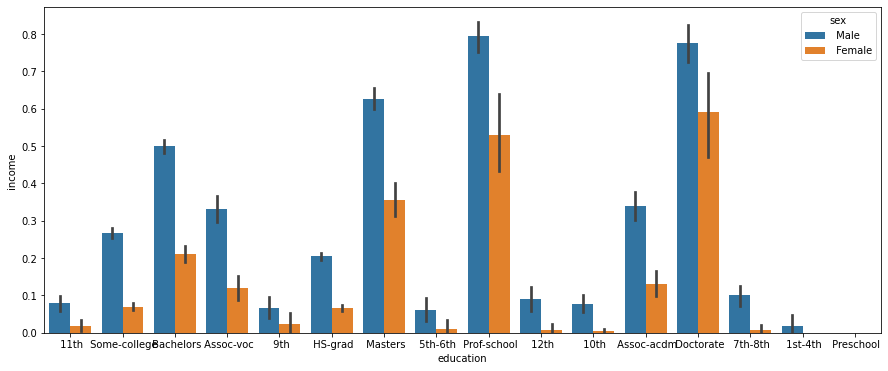

In [99]:
# workclass, income, sex 상관관계 분석 - barplot
plt.figure(figsize=(15,6))
sns.barplot(x='education', y='income', hue='sex', data=train)
plt.show()


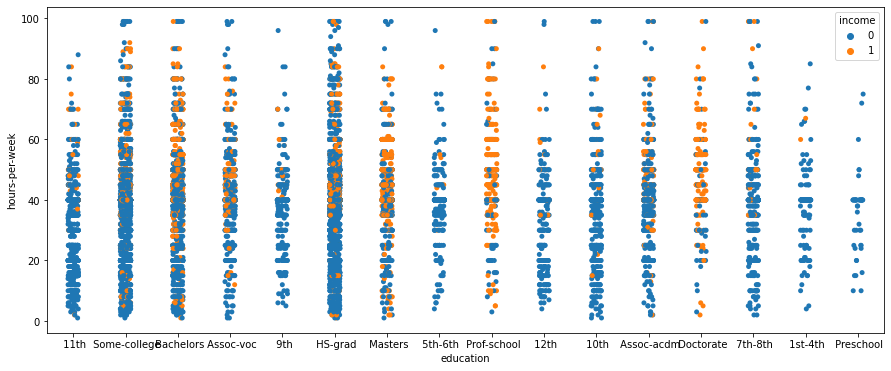

In [100]:
# education와 hours-per-week 속성 시각화 해보기 - stripplot

plt.figure(figsize=(15,6))
sns.stripplot(x='education', y='hours-per-week', hue='income', data= train)
plt.show()


#### 2.5 컬럼분석(marital-status)
- marital-status : 결혼 상태 (범주)

In [60]:
# marital-status 컬럼 널값 확인
# 29305개 -> 결측치 x
train['marital-status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29305 entries, 0 to 29304
Series name: marital-status
Non-Null Count  Dtype 
--------------  ----- 
29305 non-null  object
dtypes: object(1)
memory usage: 229.1+ KB


In [62]:
# marital-status 요약 정보 확인
train['marital-status'].describe()

count                   29305
unique                      7
top        Married-civ-spouse
freq                    13331
Name: marital-status, dtype: object

In [73]:
# marital-status : 값 확인
train['marital-status'].unique()

array([' Divorced', ' Never-married', ' Married-civ-spouse', ' Separated',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],
      dtype=object)

In [74]:
# Divorced : 이혼
# Never-married : 미혼
# Married-civ-spouse : 기혼 
# Separated : 별거
# Married-spouse-absent : 기혼 배우자 부재
# Widowed : 사별
# Married-AF-spouse : 기혼 AF 배우자

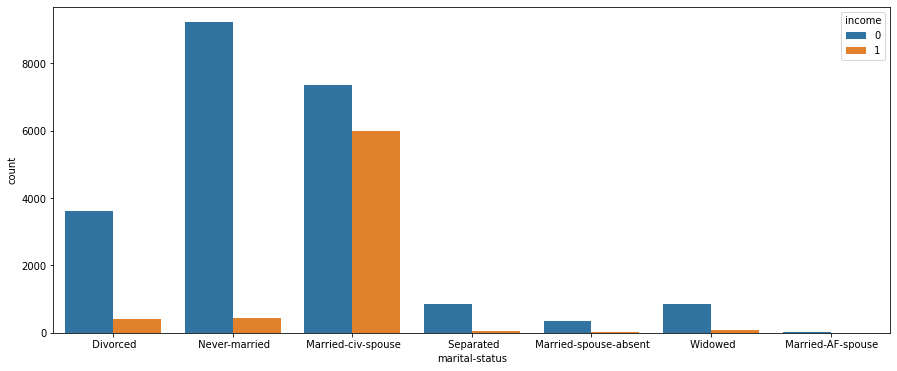

In [75]:
#  marital-status과 income 시각화 - countplot
plt.figure(figsize=(15,6))
sns.countplot(data=train, x='marital-status', hue='income')
plt.show()

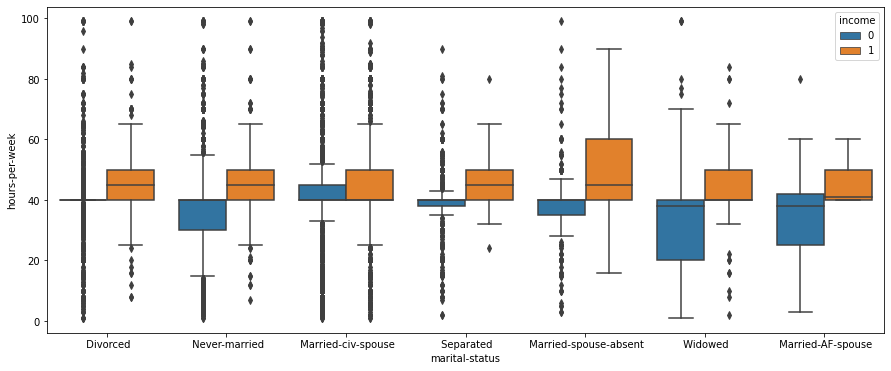

In [101]:
# marital-status와 hours-per-week 속성 시각화 해보기 - boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x='marital-status', y='hours-per-week', hue='income', data= train)
plt.show()

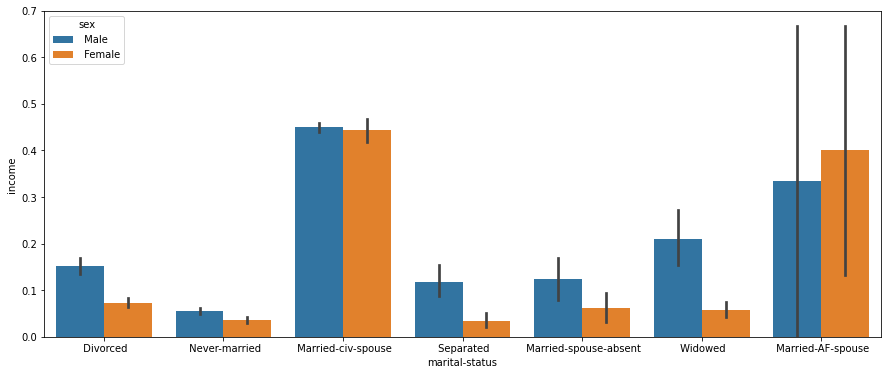

In [102]:
# workclass, income, sex 상관관계 분석 - barplot
plt.figure(figsize=(15,6))
sns.barplot(x='marital-status', y='income', hue='sex', data=train)
plt.show()

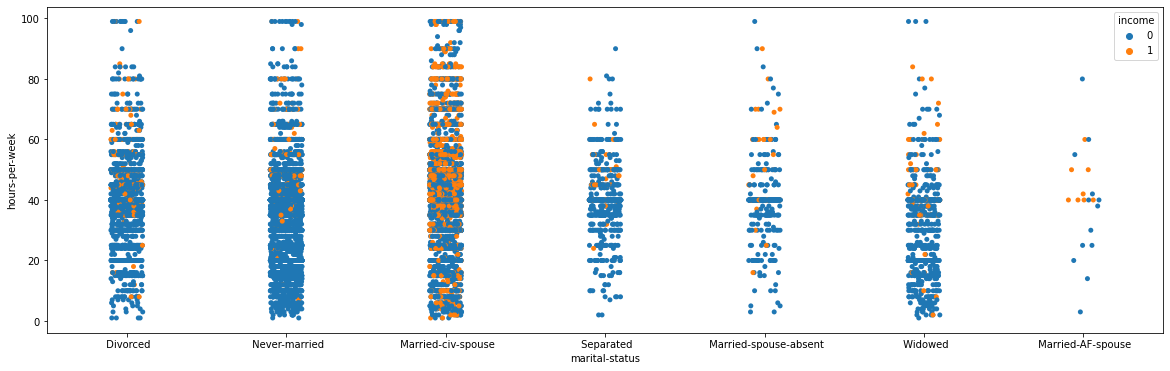

In [76]:
# marital-status과 hours-per-week와 income 시각화- stripplot

plt.figure(figsize=(20,6))
sns.stripplot(x='marital-status', y='hours-per-week', hue='income' ,data=train)
plt.show()

#### 2.6 컬럼분석(occupation)
- occupation : 직업 (범주)

In [80]:
# occupation 컬럼 결측치 확인
# 27637개 -> 결측치 존재
train['occupation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29305 entries, 0 to 29304
Series name: occupation
Non-Null Count  Dtype 
--------------  ----- 
27637 non-null  object
dtypes: object(1)
memory usage: 229.1+ KB


In [82]:
# test 데이터 셋 occupation 컬럼에 결측치 존재
test['occupation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19537 entries, 0 to 19536
Series name: occupation
Non-Null Count  Dtype 
--------------  ----- 
18396 non-null  object
dtypes: object(1)
memory usage: 152.8+ KB


In [122]:
# 임시 값으로 결측치 채워주기
train['occupation']=train['occupation'].fillna('temp')
test['occupation']=test['occupation'].fillna('temp')

In [123]:
# 갑 확인
train['occupation'].unique()

array([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', 'temp', ' Craft-repair',
       ' Sales', ' Armed-Forces'], dtype=object)

In [124]:
# Machine-op-inspct : 기계 수리
# Other-service : 다른 서비스
# Handlers-cleaners : 청소부
# Tech-support : 기술 지원
# Transport-moving : 운송업
# arming-fishing : 어부
# Prof-specialty : 전문 분야
# Priv-house-serv : 개인 주택 서비스
# Adm-clerical : 사무직
# Protective-serv : 보호 서비스
# Exec-managerial : 경영진
# temp : 임시 값
# Craft-repair : 공예 수리
# Sales : 도매상
# Armed-Forces : 군인

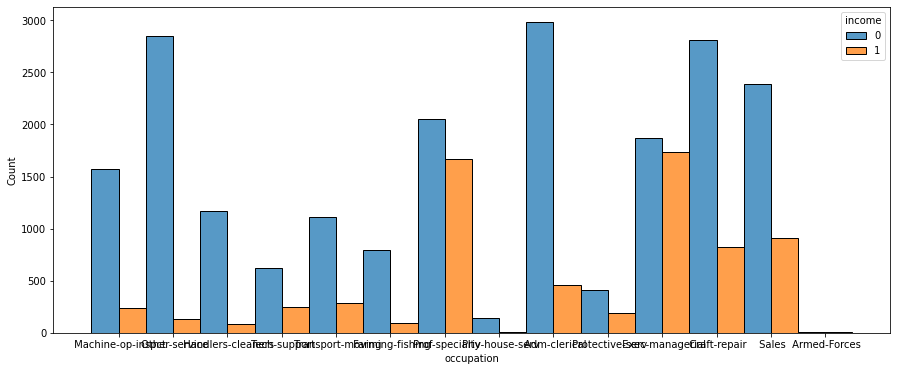

In [103]:
# occupation과 income 속성 시각화 해보기 -histplot
plt.figure(figsize=(15,6))
sns.histplot(x='occupation', hue='income', multiple='dodge', data=train)
plt.show()

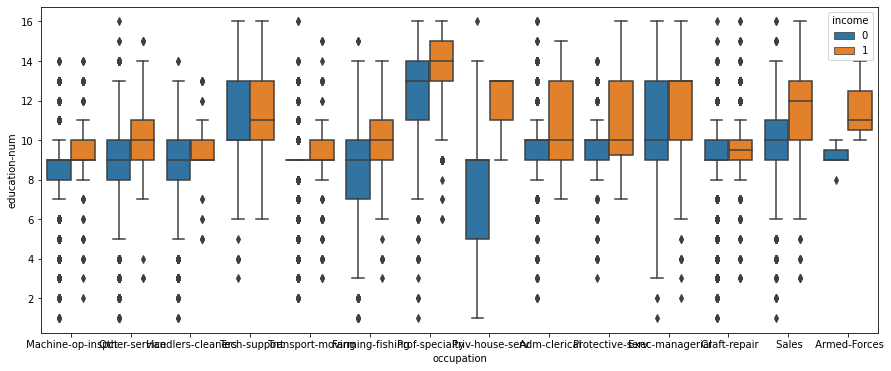

In [104]:
# occupation와 education-num과 income 속성 시각화 해보기 - boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x='occupation', y='education-num', hue='income', data= train)
plt.show()

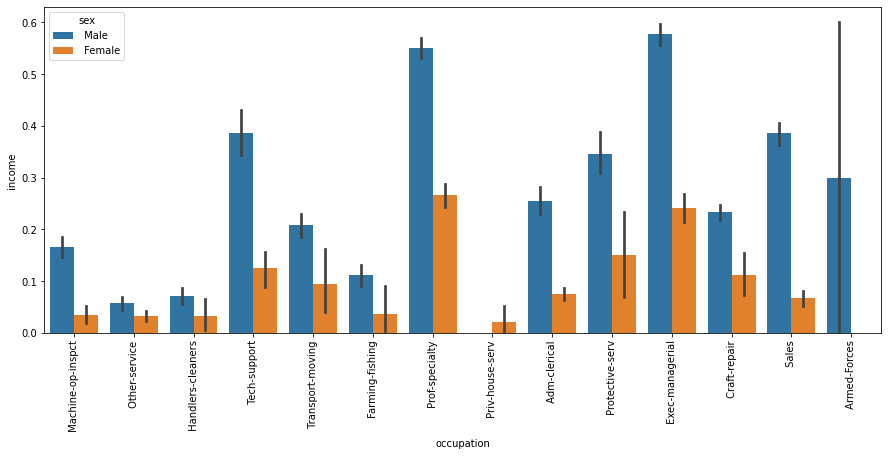

In [106]:
# occupation, income, sex 상관관계 분석 - barplot
plt.figure(figsize=(15,6))
sns.barplot(x='occupation', y='income', hue='sex', data=train)
plt.xticks(rotation=90)
plt.show()


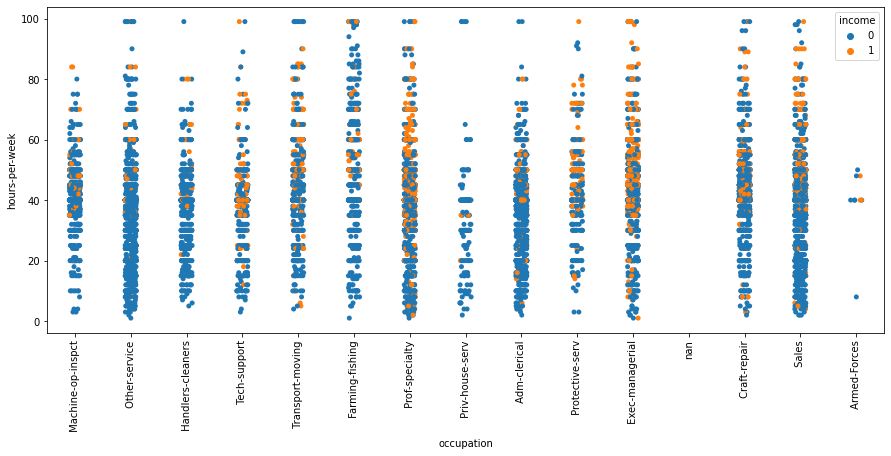

In [108]:
# occupation와 hours-per-week income 속성 시각화 해보기 - stripplot

plt.figure(figsize=(15,6))
sns.stripplot(x='occupation', y='hours-per-week', hue='income', data= train)
plt.xticks(rotation=90)
plt.show()

#### 2.7 컬럼분석(relationship)
- relationship : 가족관계 (범주)

In [109]:
# relationship 컬럼 널값 확인
# 29305개 결측치 x
train['relationship'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29305 entries, 0 to 29304
Series name: relationship
Non-Null Count  Dtype 
--------------  ----- 
29305 non-null  object
dtypes: object(1)
memory usage: 229.1+ KB


In [110]:
train['relationship'].describe()

count        29305
unique           6
top        Husband
freq         11769
Name: relationship, dtype: object

In [117]:
# 값 확인
train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Unmarried', ' Other-relative',
       ' Own-child', ' Wife'], dtype=object)

In [118]:
# Not-in-family : 가족이 없는
# Husband : 남편
# Unmarried : 결혼 안한
# Other-relative : 이외 관계
# Own-child : 자식
# Wife : 아내

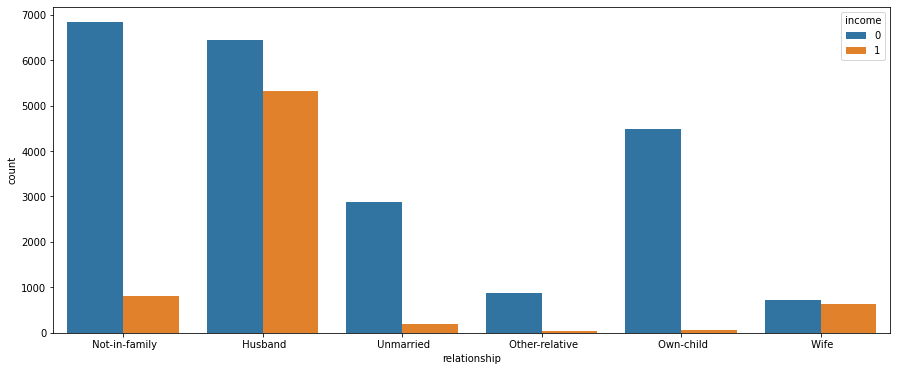

In [112]:
# relationship, income 시각화 -countplot
plt.figure(figsize=(15,6))
sns.countplot(x='relationship', hue='income', data=train)
plt.show()

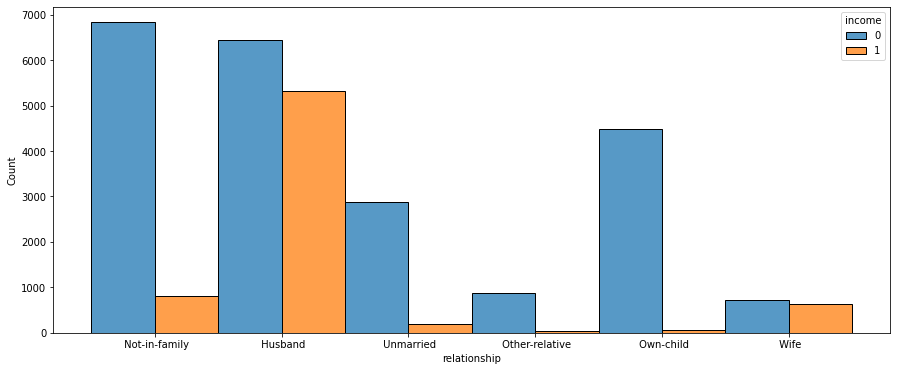

In [113]:
# relationship, income 시각화 -histplot
plt.figure(figsize=(15,6))
sns.histplot(x='relationship', hue='income', multiple='dodge', data=train)
plt.show()

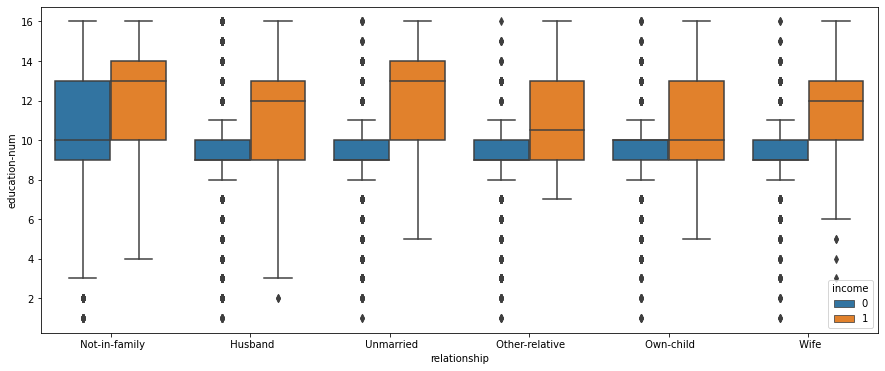

In [116]:
# workclass와 education-num 속성 시각화 해보기 - boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x='relationship', y='education-num', hue='income', data= train)
plt.show()

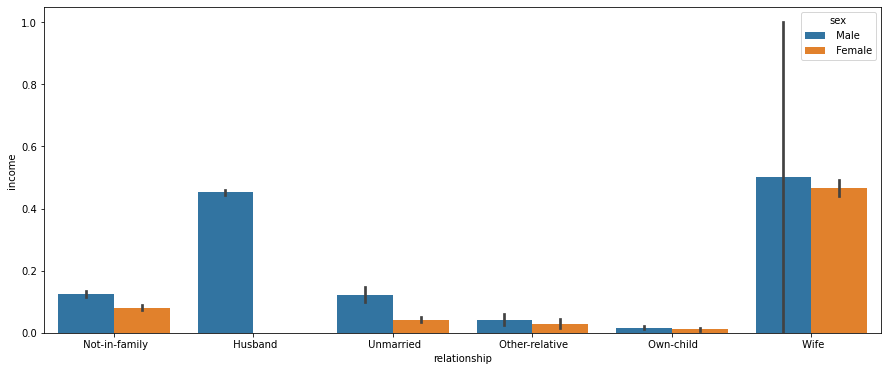

In [115]:
# relationship, income, sex 상관관계 분석 - barplot
plt.figure(figsize=(15,6))
sns.barplot(x='relationship', y='income', hue='sex', data=train)
plt.show()

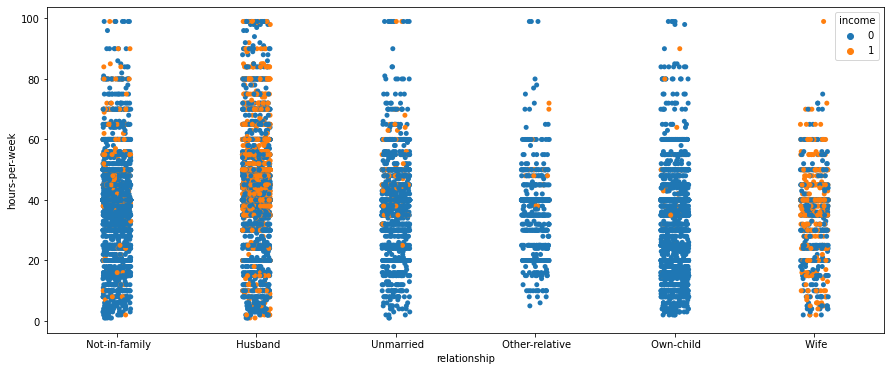

In [114]:
# relationship와 hours-per-week 속성 시각화 해보기 - stripplot

plt.figure(figsize=(15,6))
sns.stripplot(x='relationship', y='hours-per-week', hue='income', data= train)
plt.show()

#### 2.8 컬럼분석(race)
- race : 인종 (범주)

In [126]:
# race 컬럼 널값 확인
# 29305 -> 결측치 x
train['race'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29305 entries, 0 to 29304
Series name: race
Non-Null Count  Dtype 
--------------  ----- 
29305 non-null  object
dtypes: object(1)
memory usage: 229.1+ KB


In [127]:
train['race'].describe()

count      29305
unique         5
top        White
freq       25081
Name: race, dtype: object

In [128]:
# race 값 확인
train['race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [129]:
# White: 백인
# Asian-Pac-Islander: 동양인
# Black: 흑인
# Amer-Indian-Eskimo: 에스키모인
# Other: 다른 종

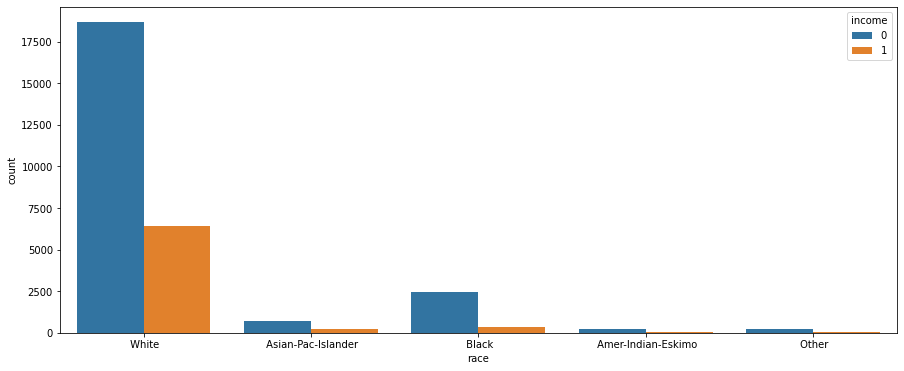

In [131]:
# race, income 시각화 -countplot

plt.figure(figsize=(15,6))
sns.countplot(x='race', hue='income', data=train)
plt.show()

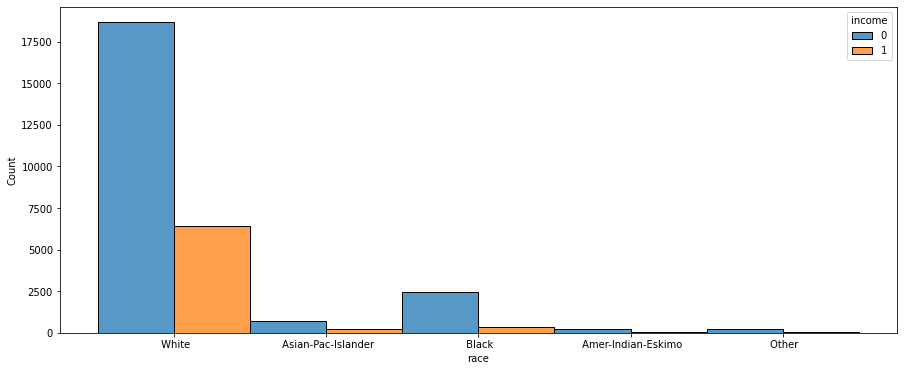

In [130]:
# race, income 시각화 -histplot
plt.figure(figsize=(15,6))
sns.histplot(x='race', hue='income', multiple='dodge', data=train)
plt.show()

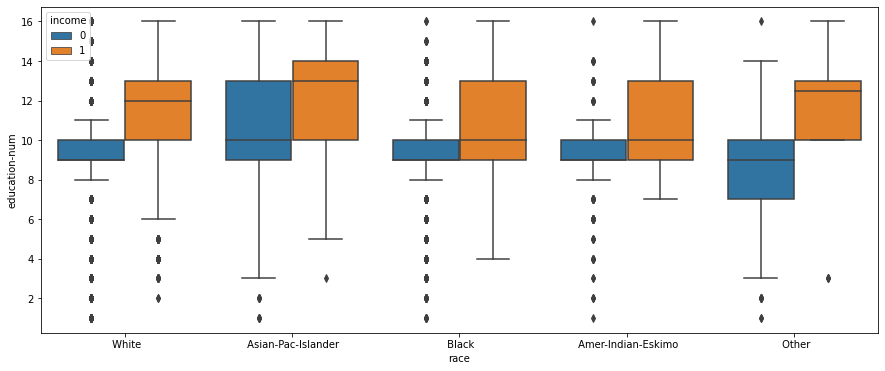

In [132]:
# race와 education-num income 속성 시각화 해보기 - boxplot

plt.figure(figsize=(15,6))
sns.boxplot(x='race', y='education-num', hue='income', data= train)
plt.show()

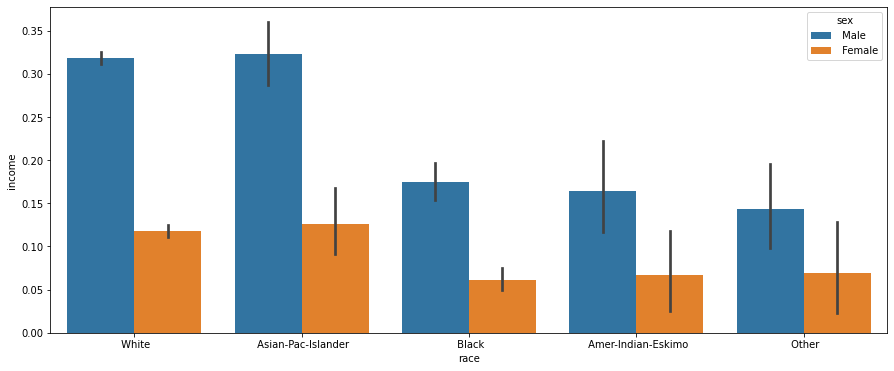

In [133]:
# race, income, sex 상관관계 분석 - barplot
plt.figure(figsize=(15,6))
sns.barplot(x='race', y='income', hue='sex', data=train)
plt.show()

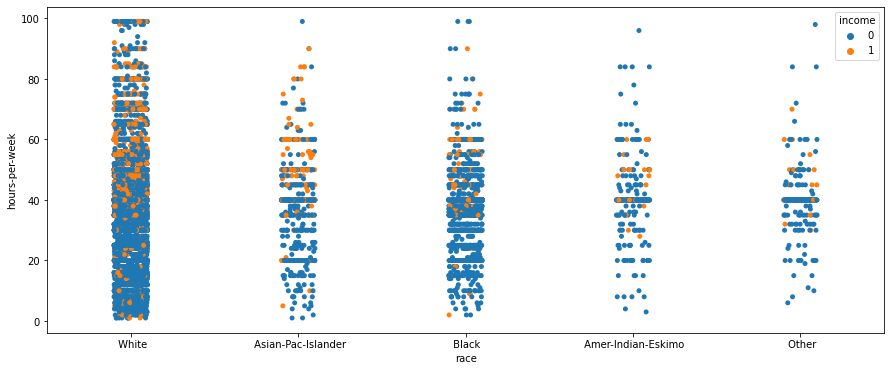

In [134]:
# race와 hours-per-week income 속성 시각화 해보기 - stripplot

plt.figure(figsize=(15,6))
sns.stripplot(x='race', y='hours-per-week', hue='income', data= train)
plt.show()